In [29]:
from pymatgen.ext.matproj import MPRester
from pprint import pprint
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

with MPRester("id9vmr7Ble8bEfMg") as m:
    bandstructure = m.get_bandstructure_by_material_id("mp-7017")
    bandplot = BSPlotter(bandstructure)
    z = bandplot.bs_plot_data()
    r = z.get('ticks')
    dist = z.get('distance')

## Bande interdite

In [52]:
print("La bande interdite de la structure électronique du NaNbN\u2082 est une bande inderdite indirecte car le minimum de la première bande de conduction n'est pas associé au même vecteur d'onde que le maximum de la dernière bande de valence. La largeur de la bande interdite vaut 0.8320 eV. On peut dès lors déterminer la nature conductrice de NaNbN\u2082. Comme la largeur de la bande interdite est inférieure à 1 eV, on sait que NaNbN\u2082 est un solide semi-conducteur.")
print(" ")
print(z.get('band_gap'))

La bande interdite de la structure électronique du NaNbN₂ est une bande inderdite indirecte car le minimum de la première bande de conduction n'est pas associé au même vecteur d'onde que le maximum de la dernière bande de valence. La largeur de la bande interdite vaut 0.8320 eV. On peut dès lors déterminer la nature conductrice de NaNbN₂. Comme la largeur de la bande interdite est inférieure à 1 eV, on sait que NaNbN₂ est un solide semi-conducteur.
 
Indirect \Gamma-F bandgap = 0.8320000000000003


## Maximum et minimum de dispersion pour la dernière bande de valence et la première bande de conduction

In [31]:
    #extraction des différentes données relatives aux différentes branhces du graphe. Par branche, je veux dire l'espace entre deux lignes verticales.
    premierebranch = z.get('energy')[0]  #gamma-L
    deuxiemebranch = z.get('energy')[1]  #L-B1|B
    troisiemebranch = z.get('energy')[2] #B1|B-Z
    quatriemebranch = z.get('energy')[3] #Z-gamma
    cinquiemebranch = z.get('energy')[4] #gamma-X|Q
    sixiemebranch = z.get('energy')[5]   #x|Q-F
    septiemebranch = z.get('energy')[6]  #F-P1
    huitiemebranch = z.get('energy')[7]  #P1-Z|L
    neuviemebranch = z.get('energy')[8]  #Z|L-P

In [32]:
    #distance de chaque branche -> donne les largeur des différentes branches
    #on passe des indices car le label donne deux fois les indices de certaines limites (par exemple on a deux fois L) cela est dû au fait qu'il y a des superpositions d'état
   
    premieredistance = (r.get('distance'))[1]-(r.get('distance'))[0]
    deuxiemedistance = (r.get('distance'))[3]-(r.get('distance'))[2]
    troisiemedistance = (r.get('distance'))[4]-(r.get('distance'))[3]
    quatriemedistance = (r.get('distance'))[6]-(r.get('distance'))[5]
    cinquiemedistance = (r.get('distance'))[8]-(r.get('distance'))[7]
    sixiemedistance = (r.get('distance'))[9]-(r.get('distance'))[8]
    septiemedistance = (r.get('distance'))[11]-(r.get('distance'))[10]
    huitiemedistance = (r.get('distance'))[13]-(r.get('distance'))[12]
    neuviemedistance = (r.get('distance'))[14]-(r.get('distance'))[13]

In [33]:
    #calcul des pentes de la courbe de la dernière bande de valence et la première bande de conduction permettant ainsi de pouvoir calculer le maximum et le minimum de dispersion. 
    
    #pente de la bande de valence dans la premiere branche 
    pente1 = ((premierebranch.get('1')[13])[len((premierebranch.get('1')[13]))-1] - (premierebranch.get('1')[13])[0])/(premieredistance)
    #pente de la bande de conduction dans la premiere brache 
    pente11 = ((premierebranch.get('1')[14])[len((premierebranch.get('1')[14]))-1] - (premierebranch.get('1')[14])[0])/(premieredistance)
    #pente de la bande de valence dans la deuxieme branche 
    pente2 = ((deuxiemebranch.get('1')[13])[len((deuxiemebranch.get('1')[13]))-1] - (deuxiemebranch.get('1')[13])[0])/(deuxiemedistance)
    #pente de la bande de conduction dans la deuxieme branche 
    pente22 = ((deuxiemebranch.get('1')[14])[len((deuxiemebranch.get('1')[14]))-1] - (deuxiemebranch.get('1')[14])[0])/(deuxiemedistance)
    #pente de la bande de valence dans la troisieme branche 
    pente3 = ((troisiemebranch.get('1')[13])[len((troisiemebranch.get('1')[13]))-1] - (troisiemebranch.get('1')[13])[0])/(troisiemedistance)
    #pente de la bande de conduction dans la troisieme branche 
    pente33 = ((troisiemebranch.get('1')[14])[len((troisiemebranch.get('1')[14]))-1] - (troisiemebranch.get('1')[14])[0])/(troisiemedistance)
    #pente de la bande de valence dans la quatrieme branche 
    pente4 = ((quatriemebranch.get('1')[13])[len((quatriemebranch.get('1')[13]))-1] - (quatriemebranch.get('1')[13])[0])/(quatriemedistance)
    #pente de la bande de conduction dans la quatrieme branche 
    pente44 = ((quatriemebranch.get('1')[14])[len((quatriemebranch.get('1')[14]))-1] - (quatriemebranch.get('1')[14])[0])/(quatriemedistance)
    #pente de la bande de valence dans la cinquieme branche 
    pente5 = ((cinquiemebranch.get('1')[13])[len((cinquiemebranch.get('1')[13]))-1] - (cinquiemebranch.get('1')[13])[0])/(cinquiemedistance)
    #pente de la bande de conduction dans la cinquieme branche 
    pente55 = ((cinquiemebranch.get('1')[14])[len((cinquiemebranch.get('1')[14]))-1] - (cinquiemebranch.get('1')[14])[0])/(cinquiemedistance)
    #pente de la bande de valence dans la sixieme branche 
    pente6 = ((sixiemebranch.get('1')[13])[len((sixiemebranch.get('1')[13]))-1] - (sixiemebranch.get('1')[13])[0])/(sixiemedistance)
    #pente de la bande de conduction dans la sixieme branche 
    pente66 = ((sixiemebranch.get('1')[14])[len((sixiemebranch.get('1')[14]))-1] - (sixiemebranch.get('1')[14])[0])/(sixiemedistance)
    #pente de la bande de valence dans la septieme branche 
    pente7 = ((septiemebranch.get('1')[13])[len((septiemebranch.get('1')[13]))-1] - (septiemebranch.get('1')[13])[0])/(septiemedistance)
    #pente de la bande de conduction dans la septieme branche 
    pente77 = ((septiemebranch.get('1')[14])[len((septiemebranch.get('1')[14]))-1] - (septiemebranch.get('1')[14])[0])/(septiemedistance)
    #pente de la bande de valence dans la huitieme branche 
    pente8 = ((huitiemebranch.get('1')[13])[len((huitiemebranch.get('1')[13]))-1] - (huitiemebranch.get('1')[13])[0])/(huitiemedistance)
    #pente de la bande de conduction dans la huitieme branche 
    pente88 = ((huitiemebranch.get('1')[14])[len((huitiemebranch.get('1')[14]))-1] - (huitiemebranch.get('1')[14])[0])/(huitiemedistance)
    #pente de la bande de valence dans la neuvieme branche 
    pente9 = ((neuviemebranch.get('1')[13])[len((neuviemebranch.get('1')[13]))-1] - (neuviemebranch.get('1')[13])[0])/(neuviemedistance)
    #pente de la bande de conduction dans la neuvieme branche 
    pente99 = ((neuviemebranch.get('1')[14])[len((neuviemebranch.get('1')[14]))-1] - (neuviemebranch.get('1')[14])[0])/(neuviemedistance)

In [34]:
    #trouver dans quelle branche/direction le maximum et le minimum de dispersion se trouvent
    dispersionmax1 = max(abs(pente1),abs(pente2),abs(pente3),abs(pente4),abs(pente5),abs(pente6),abs(pente7),abs(pente8),abs(pente9))
    #reponse pente5 -> maximum de dispersion se trouve pour la derniere bande de valence dans la branche 5
    dispersionmin1 = min(abs(pente1),abs(pente2),abs(pente3),abs(pente4),abs(pente5),abs(pente6),abs(pente7),abs(pente8),abs(pente9))
    #reponse pente3 -> minimum de dispersion se trouve pour la derniere bande de valence dans la branche 3
    dispersionmax11 = max(abs(pente11),abs(pente22),abs(pente33),abs(pente44),abs(pente55),abs(pente66),abs(pente77),abs(pente88),abs(pente99))
    #reponse pente66 -> maximum de dispersion se trouve pour la prmiere bande de conduction dans la branche 6
    dispersionmin11 = min(abs(pente11),abs(pente22),abs(pente33),abs(pente44),abs(pente55),abs(pente66),abs(pente77),abs(pente88),abs(pente99))
    #reponse pente55 -> minimum de dispersion se trouve pour la premiere bande de conduction dans la branche 5

**Voici la structure des bandes électroniques du NaNbN₂**

La dernière bande de valence présente la dispersion la plus grande dans la direction Γ - X|Q et la dispersion la plus petite dans la direction B₁|B - Z. Sur le graphe ci dessous, elles sont respectivement représentées par la flèche rouge et le flèche jaune. Pour la première bande de conduction, elle présente la plus grande dispersion dans la direction X|Q - F et la plus petite dispersion dans la direction Γ - X|Q. Sur le graphe ci dessous, elles sont respectivement représentées par la flèche blue et le flèche verte.


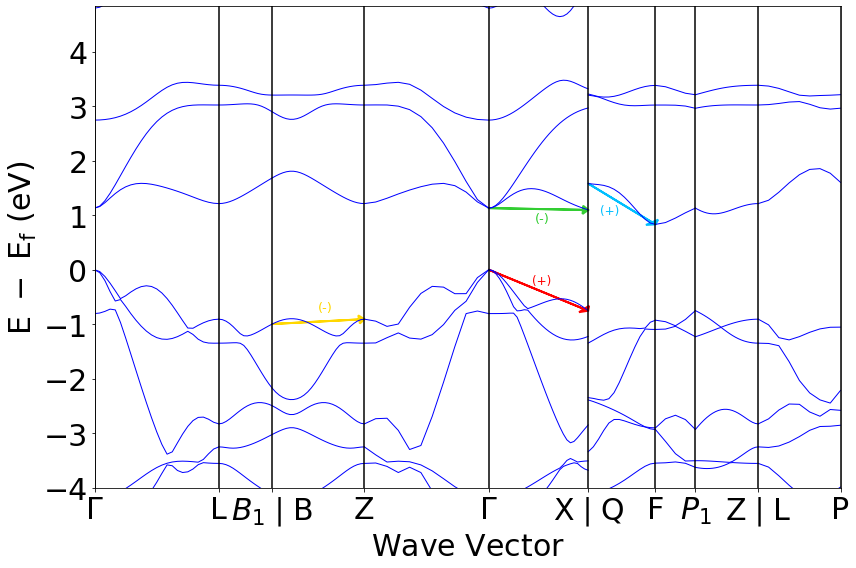

In [35]:
    printmd("**Voici la structure des bandes électroniques du NaNbN\u2082**")
    #création du graphe 
    graphe = bandplot.get_plot()
    
    #ajout des différents vecteurs représentant les maxima et le minima de dispersion
    
    #le vecteur montrant la dispersionmax1
    abc = plt.arrow((r.get('distance'))[7], (cinquiemebranch.get('1')[13])[0], cinquiemedistance, (cinquiemebranch.get('1')[13])[len(cinquiemebranch.get('1')[13]) - 1] - (cinquiemebranch.get('1')[13])[0], head_width=0.15, head_length=0.05, linewidth=2, color='r', length_includes_head=True)
    #le vecteur montrant la dispersionmin1
    abcd = plt.arrow(r.get('distance')[3], (troisiemebranch.get('1')[13])[0], troisiemedistance, (troisiemebranch.get('1')[13])[len((troisiemebranch.get('1')[13]))-1] - (troisiemebranch.get('1')[13])[0], head_width=0.15, head_length=0.05, linewidth=2, color='gold', length_includes_head=True)
    #le vecteur montrant la dispersionmax11
    abcde = plt.arrow((r.get('distance'))[8], (sixiemebranch.get('1')[14])[0], sixiemedistance, (sixiemebranch.get('1')[14])[len(sixiemebranch.get('1')[14]) - 1] - (sixiemebranch.get('1')[14])[0], head_width=0.15, head_length=0.05, linewidth=2, color='deepskyblue', length_includes_head=True)
    #le vecteur montrant la dispersionmin11
    abcdef = plt.arrow((r.get('distance'))[7], (cinquiemebranch.get('1')[14])[0], cinquiemedistance, (cinquiemebranch.get('1')[14])[len(cinquiemebranch.get('1')[14]) - 1] - (cinquiemebranch.get('1')[14])[0], head_width=0.15, head_length=0.05, linewidth=2, color='limegreen', length_includes_head=True)
    
    
    plt.text((r.get('distance'))[7]+0.5, (cinquiemebranch.get('1')[13])[0]-0.2, '(+)', horizontalalignment = 'center', verticalalignment = 'center',color='r',fontsize=12)
    plt.text((r.get('distance'))[3]+0.5, (cinquiemebranch.get('1')[13])[0]-0.7, '(-)', horizontalalignment = 'center', verticalalignment = 'center',color='gold', fontsize=13)
    plt.text((r.get('distance'))[8]+0.2, (cinquiemebranch.get('1')[14])[0]-0.05, '(+)', horizontalalignment = 'center', verticalalignment = 'center',color='deepskyblue', fontsize=12)
    plt.text((r.get('distance'))[7]+0.5, (cinquiemebranch.get('1')[14])[0]-0.2, '(-)', horizontalalignment = 'center', verticalalignment = 'center',color='limegreen', fontsize=13)
    
    print("La dernière bande de valence présente la dispersion la plus grande dans la direction \u0393 - X|Q et la dispersion la plus petite dans la direction B\u2081|B - Z. Sur le graphe ci dessous, elles sont respectivement représentées par la flèche rouge et le flèche jaune. Pour la première bande de conduction, elle présente la plus grande dispersion dans la direction X|Q - F et la plus petite dispersion dans la direction \u0393 - X|Q. Sur le graphe ci dessous, elles sont respectivement représentées par la flèche blue et le flèche verte.")

## Masse Effective 

In [36]:
print("Nous allons maintenant calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique. Pour cela, nous allons commencer par approximer le sommet (base) de la bande de valence (conduction) par une parabole. La formule générale d'une parabole est :")
print(" ")
print("f(x) = a*x² + b*x + c")
print(" ")
print("Grâce au sommet de la parabole (le maximum (minimum) de la bande de valence (conduction)) et à un autre point se trouvant sur la courbe de la bande de valence (conduction), on peut facilement faire l'approximation d'une dispersion parabolique. C'est ce qui est fait sur les deux graphes suivants.")

Nous allons maintenant calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique. Pour cela, nous allons commencer par approximer le sommet (base) de la bande de valence (conduction) par une parabole. La formule générale d'une parabole est :
 
f(x) = a*x² + b*x + c
 
Grâce au sommet de la parabole (le maximum (minimum) de la bande de valence (conduction)) et à un autre point se trouvant sur la courbe de la bande de valence (conduction), on peut facilement faire l'approximation d'une dispersion parabolique. C'est ce qui est fait sur les deux graphes suivants.


In [37]:
#donne tous les abscisses des points des différentes branches mais ils sont dans des tableaux différents c'est pour ça que je crée alldist qui remet tous les points dans le même tableau facilitant ainsi la création de mes graphes 
dist = z.get('distances')
alldist = dist[0] + dist[1] + dist[2] + dist[3] + dist[4] + dist[5] + dist[6] + dist[7] + dist[8]

#donne, dans le même tableau, toutes les ordonnées pour la courbe de la dernière bande de valence 
allenergyV = premierebranch.get('1')[13] + deuxiemebranch.get('1')[13] + troisiemebranch.get('1')[13] + quatriemebranch.get('1')[13] + cinquiemebranch.get('1')[13] + sixiemebranch.get('1')[13] + septiemebranch.get('1')[13] + huitiemebranch.get('1')[13] + neuviemebranch.get('1')[13]

#donne, dans le même tableau, toutes les ordonnées pour la courbe de la première bande de conduction
allenergyC = premierebranch.get('1')[14] + deuxiemebranch.get('1')[14] + troisiemebranch.get('1')[14] + quatriemebranch.get('1')[14] + cinquiemebranch.get('1')[14] + sixiemebranch.get('1')[14] + septiemebranch.get('1')[14] + huitiemebranch.get('1')[14] + neuviemebranch.get('1')[14]

**Dernière bande de valence**

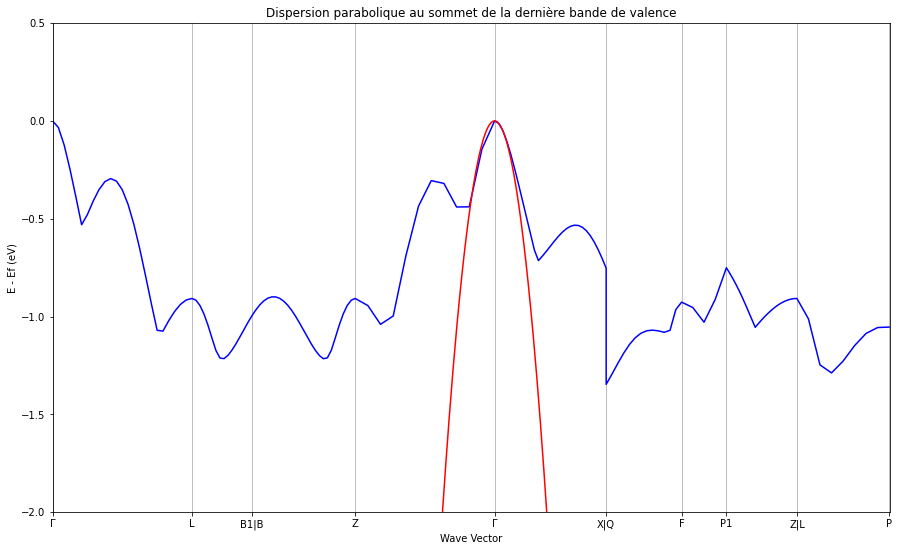

In [38]:
printmd("**Dernière bande de valence**")
#trouver le maximum de la bande de valence => ce qui sera le sommet de la parabole, celui ci se trouve dans la quatrième branche 

#abscisse du sommet de la parabole
x1 = r.get('distance')[6]
#ordonnée du sommet
y1 = ((quatriemebranch.get('1'))[13])[11] 

#abscisse du deuxième point dont on a besoin pour faire la parabole. Il se trouve sur la dernière bande de valence mais dans la branche suivante 
px1 = (z.get('distances')[4])[2] 
#c'est l'ordonnée du deuxième point
py1 = ((cinquiemebranch.get('1'))[13])[2] 

#équation d'une parabole f(x) = y = a*x² + b*x + c 
a1 = (py1 - y1)/(px1 - x1)**2
b1 = -2*x1*a1
c1 = y1 + a1*x1*x1
t1 = np.arange(0.0,5.0,0.01)

#définition de la parabole
def f(t1):
    return a1*(t1)**2 + b1*t1 + c1

#création du graphe 
fig, axes = plt.subplots(1,1,figsize=(15,9))
plt.plot(alldist,allenergyV,"b-")
plt.plot(t1,f(t1),'r')
axes.xaxis.set_ticks([r.get('distance')[0], r.get('distance')[1], r.get('distance')[3], r.get('distance')[4], r.get('distance')[6], r.get('distance')[8], r.get('distance')[9], r.get('distance')[11], r.get('distance')[13], r.get('distance')[14]])
axes.xaxis.set_ticklabels(['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P'])
axes.set_xlabel('Wave Vector') 
axes.set_ylabel('E - Ef (eV)')
axes.set_title('Dispersion parabolique au sommet de la dernière bande de valence')
axes.xaxis.grid()
plt.xlim(0.0,7.0)
plt.ylim(-2.0,0.5)
plt.show()

In [39]:
print("Pour calculer la masse effective, m*, au sommet de la bande de valence, nous avons besoin de la formule suivante : ")

Pour calculer la masse effective, m*, au sommet de la bande de valence, nous avons besoin de la formule suivante : 


![](MassEff.PNG)

In [40]:
deriveesec = a1*2*sc.electron_volt*sc.angstrom*sc.angstrom
m1 = (sc.hbar)**2/deriveesec
print("où ћ est égal à", sc.h,"[Js] et le dénominateur, correspondant à la dérivée seconde de l'énergie de la dernière bande de valence par rapport au vecteur d'onde k, vaut",deriveesec,"[Jm²].")
print("On trouve donc que la masse effective au sommet de la dernière bande de valence vaut", m1,"[kg].")
print("C'est normal de trouver une masse effective négative car sur le graphe ci-dessus, on observe que la courbure de la parabole est négative.")

où ћ est égal à 6.62607015e-34 [Js] et le dénominateur, correspondant à la dérivée seconde de l'énergie de la dernière bande de valence par rapport au vecteur d'onde k, vaut -3.3702828304803064e-38 [Jm²].
On trouve donc que la masse effective au sommet de la dernière bande de valence vaut -3.299787508975997e-31 [kg].
C'est normal de trouver une masse effective négative car sur le graphe ci-dessus, on observe que la courbure de la parabole est négative.


**Première bande de conduction**

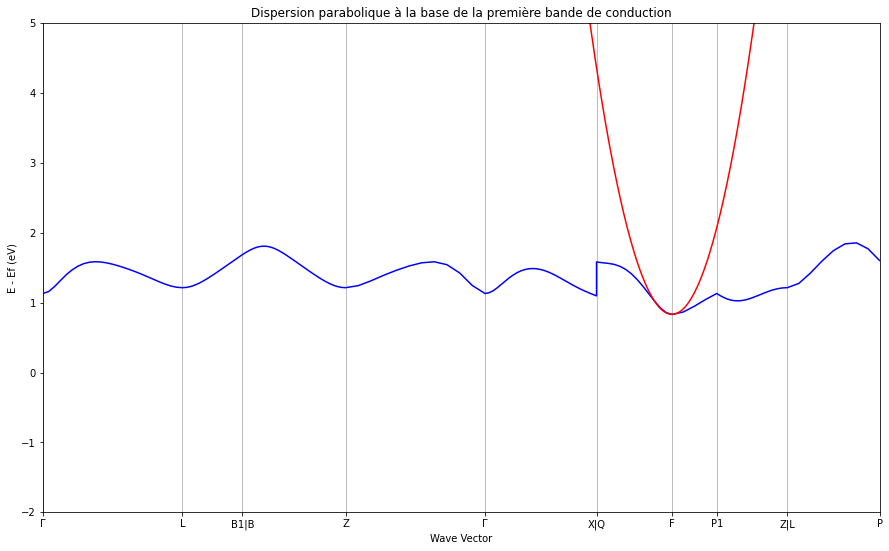

In [41]:
printmd("**Première bande de conduction**")
#trouver le minimum de la bande de conduction => ce qui sera le sommet de la parabole, celui ci se trouve dans la quatrième branche en vis-à-vis du sommet de la bande de valence 

#abscisse du sommet 
x2 = z.get('distances')[5][13] 
#ordonnée du sommet
y2 = ((sixiemebranch.get('1'))[14])[13] 

#abscisse du deuxième point dont on a besoin pour faire la parabole et qui se trouve sur la bande de conduction mais dans la branche suivante 
px2 = (z.get('distances')[5])[10] 
#ordonnée du deuxième point
py2 = ((sixiemebranch.get('1'))[14])[10] 

#équation d'une parabole f(x) = y = a*x² + b*x + c 
a2 = (py2 - y2)/(px2 - x2)**2
b2 = -2*x2*a2
c2 = y2 + a2*x2*x2
t2 = np.arange(0.0,10.0,0.01)

#définition de la parabole
def f(t2):
    return a2*(t2)**2 + b2*t2 + c2

fig, axes = plt.subplots(1,1,figsize=(15,9))
plt.plot(alldist,allenergyC,"b-")
plt.plot(t2,f(t2),'r')
axes.xaxis.set_ticks([r.get('distance')[0], r.get('distance')[1], r.get('distance')[3], r.get('distance')[4], r.get('distance')[6], r.get('distance')[8], r.get('distance')[9], r.get('distance')[11], r.get('distance')[13], r.get('distance')[14]])
axes.xaxis.set_ticklabels(['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P'])
axes.set_xlabel('Wave Vector') 
axes.set_ylabel('E - Ef (eV)')
axes.set_title('Dispersion parabolique à la base de la première bande de conduction')
axes.xaxis.grid()
plt.xlim(0.0,7.0)
plt.ylim(-2.0,5.0)
plt.show()

In [42]:
print("Pour calculer la masse effective, m*, à la base de la première bande de conduction, nous procédons de la même manière que pour la dernière bande de valence. ")
deriveesec2 = a2*2*sc.electron_volt*sc.angstrom*sc.angstrom
m2 = (sc.hbar)**2/deriveesec2
print("Ici ћ est égal à", sc.h,"[Js] et le dénominateur, correspondant à la dérivée seconde de l'énergie de la première bande de conduction par rapport au vecteur d'onde k, vaut",deriveesec2,"[Jm²].")
print("On trouve donc que la masse effective à la base de la première bande de conduction vaut", m2,"[kg].")
print("La masse effective est positive ce qui est en accord avec le graphe ci-dessus. En effet, on observe bien que la courbure de la parabole est positive.")

Pour calculer la masse effective, m*, à la base de la première bande de conduction, nous procédons de la même manière que pour la dernière bande de valence. 
Ici ћ est égal à 6.62607015e-34 [Js] et le dénominateur, correspondant à la dérivée seconde de l'énergie de la première bande de conduction par rapport au vecteur d'onde k, vaut 2.8376528685081036e-38 [Jm²].
On trouve donc que la masse effective à la base de la première bande de conduction vaut 3.919160553130716e-31 [kg].
La masse effective est positive ce qui est en accord avec le graphe ci-dessus. En effet, on observe bien que la courbure de la parabole est positive.


## Annexes

In [53]:
printmd("**Dans cette section, on peut trouver une explication sur la manière dont les maxima et les minima de dispersion ont été identifiés.**")
print("Pour trouver les minima et les maxima de dispersion, nous avons regardé dans quelle direction, pour une bande électronique donnée, la pente de la courbe était la plus petite/la plus grande. Ci dessous sont respectivement affichées les différentes pentes dans les différentes directions pour la dernière bande de valence et la première bande de conduction.")

**Dans cette section, on peut trouver une explication sur la manière dont les maxima et les minima de dispersion ont été identifiés.**

Pour trouver les minima et les maxima de dispersion, nous avons regardé dans quelle direction, pour une bande électronique donnée, la pente de la courbe était la plus petite/la plus grande. Ci dessous sont respectivement affichées les différentes pentes dans les différentes directions pour la dernière bande de valence et la première bande de conduction.


In [51]:
printmd("**Pente de la bande de valence dans la première branche, autrement dit dans la direction \u0393 - L**")
print(pente1)
printmd("**Pente de la bande de conduction dans la première branche, autrement dit dans la direction \u0393 - L**")
print(pente11)
printmd("**Pente de la bande de valence dans la deuxième branche, autrement dit dans la direction L - B\u2081|B**")
print(pente2)
printmd("**Pente de la bande de conduction dans la deuxième branche, autrement dit dans la direction L - B\u2081|B**")
print(pente22)
printmd("**Pente de la bande de valence dans la troisième branche, autrement dit dans la direction B\u2081|B - Z**")
print(pente3)
printmd("**Pente de la bande de conduction dans la troisième branche, autrement dit dans la direction B\u2081|B - Z**")
print(pente33)
printmd("**Pente de la bande de valence dans la quatrième branche, autrement dit dans la direction Z - \u0393**")
print(pente4)
printmd("**Pente de la bande de conduction dans la quatrième branche, autrement dit dans la direction Z - \u0393**")
print(pente44)
printmd("**Pente de la bande de valence dans la cinquième branche, autrement dit dans la direction \u0393 - X|Q**")
print(pente5)
printmd("**Pente de la bande de conduction de la cinquième branche, autrement dit dans la direction \u0393 - X|Q**")
print(pente55)
printmd("**Pente de la bande de valence de la sixième branche, autrement dit dans la direction X|Q - F**")
print(pente6)
printmd("**Pente de la bande de conduction de la sixième branche, autrement dit dans la direction X|Q - F**")
print(pente66)
printmd("**Pente de la bande de valence de la septième branche, autrement dit dans la direction F - P1**")
print(pente7)
printmd("**Pente de la bande de conduction de la septième branche, autrement dit dans la direction F - P1**")
print(pente77)
printmd("**Pente de la bande de valence de la huitième branche, autrement dit dans la direction P1 - Z|L**")
print(pente8)
printmd("**Pente de la bande de conduction de la huitième branche, autrement dit dans la direction P1 - Z|L**")
print(pente88)
printmd("**Pente de la bande de valence de la neuvième branche, autrement dit dans la direction Z|L - P**")
print(pente9)
printmd("**Pente de la bande de conduction de la neuvième branche, autrement dit dans la direction Z|L - P**")
print(pente99)
print(' ')

printmd("**Pente de la branche (dans la direction \u0393 - X|Q) dans laquelle on observe la dispersion maximale de la dernière bande de valence**")
print(dispersionmax1)
printmd("**Pente de la branche (dans la direction B\u2081|B - Z) dans laquelle on observe la dispersion minimale de la dernière bande de valence**")
print(dispersionmin1)
printmd("**Pente de la branche (dans la direction X|Q - F) dans laquelle on observe la dispersion maximale de la première bande de conduction**")
print(dispersionmax11)
printmd("**Pente de la branche (dans la direction \u0393 - X|Q) dans laquelle on observe la dispersion minimale de la première bande de conduction**")
print(dispersionmin11)

**Pente de la bande de valence dans la première branche, autrement dit dans la direction Γ - L**

-0.778120987756502


**Pente de la bande de conduction dans la première branche, autrement dit dans la direction Γ - L**

0.07118267605399442


**Pente de la bande de valence dans la deuxième branche, autrement dit dans la direction L - B₁|B**

-0.17706151300720105


**Pente de la bande de conduction dans la deuxième branche, autrement dit dans la direction L - B₁|B**

0.9419991881409028


**Pente de la bande de valence dans la troisième branche, autrement dit dans la direction B₁|B - Z**

0.1026812121597553


**Pente de la bande de conduction dans la troisième branche, autrement dit dans la direction B₁|B - Z**

-0.5462825706672882


**Pente de la bande de valence dans la quatrième branche, autrement dit dans la direction Z - Γ**

0.778120944821377


**Pente de la bande de conduction dans la quatrième branche, autrement dit dans la direction Z - Γ**

-0.0711826721262799


**Pente de la bande de valence dans la cinquième branche, autrement dit dans la direction Γ - X|Q**

-0.8063243854801497


**Pente de la bande de conduction de la cinquième branche, autrement dit dans la direction Γ - X|Q**

-0.0364464625183803


**Pente de la bande de valence de la sixième branche, autrement dit dans la direction X|Q - F**

0.6655438417024971


**Pente de la bande de conduction de la sixième branche, autrement dit dans la direction X|Q - F**

-1.1878713937360925


**Pente de la bande de valence de la septième branche, autrement dit dans la direction F - P1**

0.46957242121367526


**Pente de la bande de conduction de la septième branche, autrement dit dans la direction F - P1**

0.7983799584799048


**Pente de la bande de valence de la huitième branche, autrement dit dans la direction P1 - Z|L**

-0.26622132457756564


**Pente de la bande de conduction de la huitième branche, autrement dit dans la direction P1 - Z|L**

0.1404020743631998


**Pente de la bande de valence de la neuvième branche, autrement dit dans la direction Z|L - P**

-0.18937913311774476


**Pente de la bande de conduction de la neuvième branche, autrement dit dans la direction Z|L - P**

0.5046221527908149
 


**Pente de la branche (dans la direction Γ - X|Q) dans laquelle on observe la dispersion maximale de la dernière bande de valence**

0.8063243854801497


**Pente de la branche (dans la direction B₁|B - Z) dans laquelle on observe la dispersion minimale de la dernière bande de valence**

0.1026812121597553


**Pente de la branche (dans la direction X|Q - F) dans laquelle on observe la dispersion maximale de la première bande de conduction**

1.1878713937360925


**Pente de la branche (dans la direction Γ - X|Q) dans laquelle on observe la dispersion minimale de la première bande de conduction**

0.0364464625183803
